## 3. 로지스틱 회귀(Logistic Regression)

### 분류(Classification)

#### 분류

* 이메일 : Spam / Not Spam?
* 온라인 거래 (Online Transactions): 사기행각(Fraudulent) (Yes / No)?
* 종양 (Tumor) : 악성(Malignant) / 양성(Benign)?


* $y \in \{0, 1\}$  : 이진분류(Binary Classification)

  0 : "음 클래스(Negative Class)" (e.g. benign tumor)<br>
  1 : "양 클래스(Positive Class)" (e.g. malignant tumor)


* $y \in \{0, 1, 2, 3\}$ : 다중분류(Multi-class Classification)
<br>
<br>

#### 분류

선형회귀로 종양(Tumer) 크기에 따른 악성(malignant) 여부 판단 시의 문제:
<img src="./images/logistic.png" width="400">

<br>

출력 $h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x$ 의 0.5 에서의 임계값 분류기(Threshold classifier) :

$$ h_\theta(x) \ge 0.5 \text{, predict } y = 1 \quad (\text{i.e. 악성})$$

$$ h_\theta(x) < 0.5 \text{, predict } y = 0 \quad (\text{i.e. 양성})$$

<br>

<br>


#### 분류

* 분류(Classification)에서의 타겟: $$ y = 0 \text{ or } 1 $$


* 선형회귀(Linear Regression)에서의 가설 : 

$$[ h_\theta(x) = \theta^T x] \text{ can be } > 1 \text{ or } < 0 $$


* 로지스틱 회귀(Logistic Regression)에서의 가설: 

$$ 0 \le h_\theta(x) \le 1$$

$\quad \therefore$ 분류 문제에 적합함
<br>

<br>

### 가설 표현 (Hypothesis Representation)

#### 로지스틱 회귀 모델(Logistic Regression Model)

우리가 원하는 것 :  $ 0 \le h_\theta(x) \le 1 $

$ h_\theta(x) = \theta^T x \quad \Rightarrow \quad = g( \theta^T x ) $

<img src="./images/axis_simple.png" align="right" width="300">

Sigmoid function / Logistic function 를 사용함:

$$g(z) = { 1 \over 1 + e^{-z} } $$ 



<br>
$ \text{let } \theta^T x = z \quad \Rightarrow \quad $

$$ h_\theta(x) = { 1 \over 1 + e^{-\theta^T x } }$$


<br>
<br>

<IPython.core.display.Javascript object>


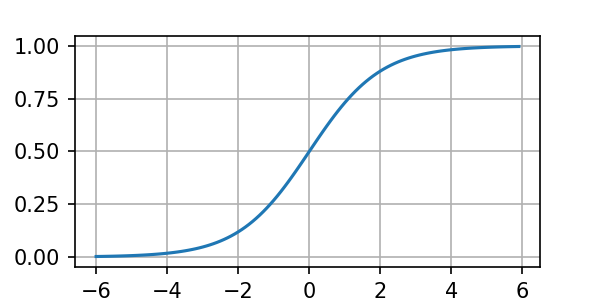

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-6,6,0.1)
y = 1 / ( 1 + np.exp(-x))

plt.figure(figsize=(4,2))
plt.plot(x,y)
plt.grid()

#### 가설 출력의 해석

$h_\theta(x) = $ 입력 $x$ 에서 $y=1$ 가 될 추정된 확률

예) $ x = \begin{bmatrix} x_0 \\ x_1 \\ \end{bmatrix} = \begin{bmatrix} 1 \\ \text{tumorSize}  \end{bmatrix}  $ 일 때, 

$ h_\theta(x) = 0.7 \quad \text{이라면} \Rightarrow $ 환자의 종양이 악성일 확률이 70%임을 말한다.

<br>

$P(y=1|x;\theta)$ : " $\theta$ 로 파라메타화 된, 주어진 $x$에 대한 $y=1$ 일 확률"

$y = 0 \text{ or } 1$
$$ P(y=0|x;\theta) + P(y=1|x;\theta) = 1 $$

<br>
$$ P(y=0|x;\theta) = 1 - P(y=1|x;\theta) $$
<br>

### 결정 경계(Decision boundary)

**로지스틱 회귀(Logistic regression)**
<img src="./images/axis_simple.png" align="right" width="300">

$$ h_\theta(x) = g(\theta^T x ) $$

$$ g(z) = { 1 \over 1 + e^{-z} }$$

<br>
Suppose predict "$y=1$" if $h_\theta(x)\ge 0.5$

$$g(z) \ge 0.5 $$

$$ h_\theta (x) = g(\theta^T x) \ge 0.5 \quad \text{i.e.}z \ge 0, \theta^Tx \ge 0 $$
<br>


Suppose predict "$y=0$" if $h_\theta(x) < 0.5$

$$g(z) < 0.5 $$

$$ h_\theta (x) = g(\theta^T x) < 0.5 \quad \text{i.e.}z < 0, \theta^Tx < 0 $$

$\therefore$  결정경계 :$ \theta^T x = \theta_0 + \theta_1 x = 0 \Rightarrow x = -{\theta_0 \over \theta_1} = 0 ( \text{in this exampls})$ 

**선형 결정경계(Linear Decision Boundary) **


<img src="./images/linear_boundary.png" align="left" width="150">
<br>

<br>

$$ h_\theta(x) = g( \theta^T x ) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 )$$

<br>

<br>

<br>

 Predict "$y=1$" $\quad \text{if } z \ge 0 \quad $ ( i.e. $\quad \text{if }  -3 + x_1 + x_2 \ge 0$) 

Predict "$y=0$" $\quad \text{if } z < 0 \quad $ ( i.e. $\quad \text{if }  -3 + x_1 + x_2 < 0$) 

$\therefore $ 결정경계 :$ \theta^T x = 0 \Rightarrow x_1 + x_2 = 3 $

<br>


**비선형 결정경계(Non-linear Decision Boundary)**

<img src="./images/nonlinear_boundary.png" align="left" width="150">

$$ h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 +\theta_3 x_1^2 + \theta_4 x_2^2)$$

$$\text { Let} \quad \theta^T = [ -1, 0, 0, 1, 1 ] $$

$\quad  \quad $  Predict "y=1" if $ g(z) \ge 0.5; z \ge 0 $

$$ \Rightarrow \theta^T x = -1 + x_1^2 + x_2^2 \ge 0$$

$$ \therefore \text{결정경계} : x_1^2 + x_2^2 = 1 $$
<br>

<br>

<img src="./images/no_boundary.png" align="left" width="150">

$$ h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 +\theta_3 x_1^2 + \theta_4 x_1^2x_2 + \theta_5 x_1^2x_2^2 + \theta_6 x_1^3 x_2 + \cdots)$$
<br>

<br>



### 비용함수(Cost function)

<br>

**훈련자료:** $ \{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\cdots,(x^{(m)},y^{(m)}) \}$ 

<br>

m examples $ x \in \begin{bmatrix} x_0 \\ x_1 \\ \vdots\\ x_n \end{bmatrix} \quad x_0 = 1, y \in \{0,1\} $

<br>

$$h_\theta(x) = { 1 \over 1 + e^{-\theta^T x}}$$

How to choose parameters $\theta$?


**비용함수**

선형 회귀 : $J(\theta) = {1 \over m} \sum_{i=1}^m {1\over2} (h_\theta(x^{(i)}) - y^{(i)})^2 = \text{Average of Cost}$
<br>

Let $Cost(h_\theta(x), y) = {1 \over 2} (h_\theta(x) - y)^2 $

로지스틱 회귀 : $J(\theta) = {1 \over m} \sum_{i=1}^m Cost(h_\theta(x), y) $

"non-convex" $\quad \quad \quad \quad \quad \quad \quad \quad$ "convex"
<br>
<img src="./images/nonconvex.png" width="200" height="150" align="left">

<img src="./images/convex.png" width="250" clear="both">

<br>
<br>


**로지스틱 회귀 비용함수**

$$\text{Cost}(h_\theta(x), y) = 
\left\{
  \begin{array}{lr}
    -log(h_\theta(x)) & \quad \text{if } y=1\\
    -log(1-h_\theta(x)) & \quad \text{if } y=0
  \end{array}
\right.
$$

<br> 

<img src="./images/-log.png" width="150" height="150" align="left">

$\quad \quad$ For $y = 1$, if $h_\theta(x)=1 \quad \Rightarrow  Cost = 0$ 

$\quad \quad$ But as $h_\theta(x) \rightarrow 0$, Cost $\rightarrow \infty$

$\quad \quad$  $h_\theta(x)=0$ ,($P(y=1|x;\theta)$를 예측) 이지만 $y = 1$이면, 

$\quad \quad$  우리는 매우 큰 비용으로 학습 알고리즘에 불이익을 줄 것입니다.
$\quad \quad$ 


<br>

<br>


<br>



**로지스틱 회귀 비용함수**

$$\text{Cost}(h_\theta(x), y) = 
\left\{
  \begin{array}{lr}
    -log(h_\theta(x)) & \quad \text{if } y=1\\
    -log(1-h_\theta(x)) & \quad \text{if } y=0
  \end{array}
\right.
$$

<br>

<img src="./images/-log2.png" width="150" align="left">

$\quad \quad$ For $y = 0$, if $h_\theta(x)=0 \quad \Rightarrow  Cost = 0$ 

$\quad \quad$ But as $h_\theta(x) \rightarrow 1$, Cost $\rightarrow \infty$

<br>

<br>

<br>

<br>

<br>

### 단순 비용함수 및 경사하강

#### 로지스틱 회귀 비용함수

$$J(\theta) = {1 \over m} \sum_{i=1}^m \text{Cost}(h_\theta(x^{(i)}), y^{(i)}) $$


$$\text{Cost}(h_\theta(x), y) = 
\left\{
  \begin{array}{lr}
    -log(h_\theta(x)) & \quad \text{if } y=1\\
    -log(1-h_\theta(x)) & \quad \text{if } y=0
  \end{array}
\right.
$$

Note: $y=0$ or 1 always

$$\text{Cost}(h_\theta(x), y) = -y \log (h_\theta(x)) -(1-y) \log (1-h_\theta(x)) $$

if $y = 1$ : $ \text{Cost}(h_\theta(x), y) = - \log (h_\theta(x)) $

if $y = 0$ : $ \text{Cost}(h_\theta(x), y) =  -\log (1-h_\theta(x)) $

<br>


#### 로지스틱 회귀 비용함수

$$ J(\theta) = {1 \over m} \sum_{i=1}^m \text{Cost}(h_\theta(x^{(i)}), y^{(i)}) $$
$$J(\theta) = -{ 1 \over m } \left[ \sum_{i=1}^m  y^{(i)} \log (h_\theta(x^{(i)})) + (1-y^{(i)}) \log (1-h_\theta(x^{(i)}))\right]
$$

<br>

To fit parameter $\theta$ : 

$$ \min_\theta J(\theta) $$

To make a prediction given new x:

$$ \text{Output } h_\theta(x) = { 1 \over 1 + e^{-\theta^T x} } $$

<br>

#### 경사하강

$$J(\theta) = -{ 1 \over m } \left[ \sum_{i=1}^m  y^{(i)} \log (h_\theta(x^{(i)})) + (1-y^{(i)}) \log (1-h_\theta(x^{(i)}))\right]
$$

Want $\min_\theta J(\theta)$

Repeat {

$$ \theta_j := \theta_j - \alpha {\partial \over \partial \theta_j } J(\theta )$$

}

Where
$$ {\partial \over \partial \theta_j} J(\theta) = {1 \over m}\sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)} )\cdot x_j^{(i)}$$

#### 경사하강

$$J(\theta) = -{ 1 \over m } \left[ \sum_{i=1}^m  y^{(i)} \log (h_\theta(x^{(i)})) + (1-y^{(i)}) \log (1-h_\theta(x^{(i)}))\right]
$$

Want $\min_\theta J(\theta)$

Repeat {

$$ \theta_j := \theta_j - \alpha \sum_{i=1}^m  (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$

}

Algorithm looks identical to linear regression except $h_\theta(x)$

<br>

<br>


## 다중 클래스 분류 : 일-대-전부 (One-vs-all)

### 다중 분류

* 이메일 폴더링 / 태깅 : 직장, 친구, 가족, 취미


* 의료 다이어그램 : 아프지 않음, 감기, 독감


* 날씨 : 맑은, 흐림, 비, 눈



Binary classification : $\quad \quad \quad \quad \quad \quad \quad \quad$ Multi-class Classification:


<img src="./images/binary.png" width="200" align="left">



<img src="./images/one-vs-all.png" width="200">

<img src="./images/one-vs-all.png" width="170">

| 1-st Binary Classification | 2-nd Binary Classification| 3-rd Binary Classification
|---|---|---
|<img src="./images/1.png" width="170"  > |<img src="./images/2.png" width="170" >|<img src="./images/3.png" width="170" >


$$ h_\theta^{(i)}(x) = P(y=i|x;\theta)  \quad (i=1,2,3)$$


## 일-대-전부(one-vs-all)

각 클래스 $i$ 에 대해 $y=i$일 확률을 예측하기 위해서는 로지스틱 회귀 이진분류기 $h_\theta^{(i)}(x)$ 를 훈련한다.

<br>


새로운 입력 $x$에 대하여 예측을 하려면, 

$\max_i h_\theta^{(i)} (x)$ 를 최대화하는 클래스 $i$ 를 선택합니다.

<br>

## (Optional) 고급 최적화(Advanced optimization)

**최적화 알고리즘**

비용함수 $J(\theta)$, $\min_\theta J(\theta)$ 를 원함.

주어진 $\theta$에 대하여, 다음을 계산하는 코드를 가진다.

* $J(\theta)$
* ${\partial \over \partial \theta_j} J(\theta) \quad (\text{for } j=0,1,\cdots,n)$

**경사하강**

Repeat {

$$\theta_j := \theta_j - \alpha {\partial \over \partial \theta_j } J(\theta) $$
 
 }


**최적화 알고리즘**

* 경사하강
* 콘쥬게이트 그라디언트(Conjugate Gradient)
* BFGS
* L-BFGS

**장점**

* 수동으로 $\alpha$를 결정할 필요가 없다.
* 종종 경사하강보다 빠르다

**단점**
* 구현이 좀 더 복잡하다.